# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [30]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()
dados_extras = pd.read_csv("dados_extras_ro.csv", encoding='latin1')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
grupo_latitude = sinasc_raw.groupby(sinasc_raw['munResLat'] > -10.5)

variaveis_numericas = ['IDADEMAE', 'PESO']

for variavel in variaveis_numericas:
    print(f"Operações estatísticas para '{variavel}':")
    print(grupo_latitude[variavel].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']))
    print("\n")


Operações estatísticas para 'IDADEMAE':
              sum       mean  min  max  median       std        var
munResLat                                                          
False      340167  26.178775   12   53    26.0  6.320171  39.944563
True       365094  26.014964   11   52    25.0  6.447663  41.572355


Operações estatísticas para 'PESO':
                sum         mean  min   max  median         std            var
munResLat                                                                     
False      42101809  3240.096121  258  5985  3270.0  531.794694  282805.596163
True       45555148  3246.055864  295  5190  3275.0  556.487709  309678.570242




### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
sinasc_raw['Faixa_Area'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')],
                                   labels=['Abaixo_de_3000', 'Acima_de_3000'])

grupo_area = sinasc_raw.groupby('Faixa_Area')

variaveis_numericas = ['QTDFILVIVO', 'QTDFILMORT']

for variavel in variaveis_numericas:
    print(f"Operações estatísticas para '{variavel}':")
    print(grupo_area[variavel].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']))
    print("\n")

Operações estatísticas para 'QTDFILVIVO':
                    sum      mean  min   max  median       std       var
Faixa_Area                                                              
Abaixo_de_3000   4773.0  0.924284  0.0  30.0     1.0  1.075442  1.156575
Acima_de_3000   22053.0  1.086890  0.0  14.0     1.0  1.191750  1.420268


Operações estatísticas para 'QTDFILMORT':
                   sum      mean  min   max  median       std       var
Faixa_Area                                                             
Abaixo_de_3000  1260.0  0.244803  0.0   4.0     0.0  0.551215  0.303838
Acima_de_3000   5383.0  0.272116  0.0  28.0     0.0  0.629081  0.395743




/var/folders/1c/8t3lmq411zzgbh7lkh2qx0kc0000gn/T/ipykernel_8551/2626679114.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_area = sinasc_raw.groupby('Faixa_Area')


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc_raw['Faixa_Altitude'] = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), 500, 1000, 1500, float('inf')],
                                       labels=['<500', '500-1000', '1000-1500', '>1500'])

grupo_altitude = sinasc_raw.groupby('Faixa_Altitude')

variaveis_numericas = ['IDADEPAI', 'IDADEMAE']

for variavel in variaveis_numericas:
    print(f"Operações estatísticas para '{variavel}':")
    print(grupo_altitude[variavel].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']))
    print("\n")

Operações estatísticas para 'IDADEPAI':
                     sum       mean   min   max  median       std        var
Faixa_Altitude                                                              
<500            230692.0  31.023669  15.0  86.0    30.0  7.777849  60.494934
500-1000          5806.0  34.152941  18.0  60.0    34.0  6.812807  46.414340
1000-1500            0.0        NaN   NaN   NaN     NaN       NaN        NaN
>1500                0.0        NaN   NaN   NaN     NaN       NaN        NaN


Operações estatísticas para 'IDADEMAE':
                   sum       mean   min   max  median       std        var
Faixa_Altitude                                                            
<500            663207  26.072532  11.0  53.0    25.0  6.391458  40.850730
500-1000         42030  26.433962  14.0  46.0    26.0  6.310937  39.827921
1000-1500            0        NaN   NaN   NaN     NaN       NaN        NaN
>1500                0        NaN   NaN   NaN     NaN       NaN        NaN




/var/folders/1c/8t3lmq411zzgbh7lkh2qx0kc0000gn/T/ipykernel_8551/3073324913.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_altitude = sinasc_raw.groupby('Faixa_Altitude')


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

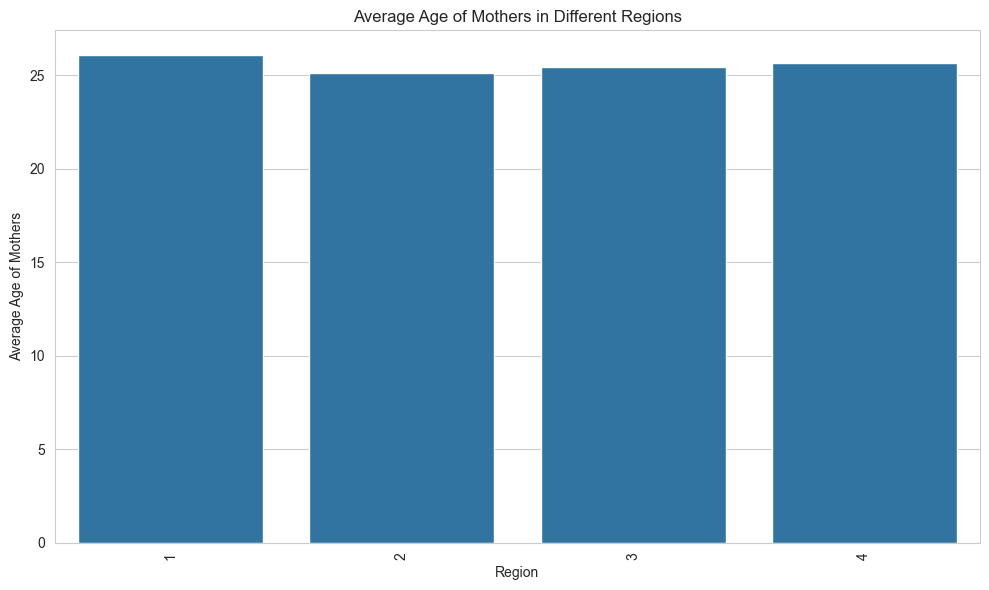

In [45]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

average_age_by_region = sinasc_raw.groupby('LOCNASC')['IDADEMAE'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=average_age_by_region, x='LOCNASC', y='IDADEMAE')
plt.title('Average Age of Mothers in Different Regions')
plt.xlabel('Region')
plt.ylabel('Average Age of Mothers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IFDM
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [57]:
data = {
    'Município': [
        'Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 'Santa Luzia d\'Oeste',
        'Rolim de Moura', 'Chupinguaia', 'São Miguel do Guaporé', 'Pimenteiras do Oeste', 'Teixeirópolis',
        'Colorado do Oeste', 'Jaru', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste',
        'Ouro Preto do Oeste', 'São Francisco do Guaporé', 'Candeias do Jamari', 'Buritis', 'São Felipe d\'Oeste',
        'Presidente Médici', 'Cerejeiras', 'Monte Negro', 'Urupá', 'Espigão d\'Oeste', 'Seringueiras',
        'Alvorada d\'Oeste', 'Itapuã do Oeste', 'Cabixi', 'Novo Horizonte do Oeste', 'Nova Brasilândia d\'Oeste',
        'Vale do Paraíso', 'Corumbiara', 'Alto Paraíso', 'Cacaulândia', 'Vale do Anari', 'Ministro Andreazza',
        'Costa Marques', 'Nova União', 'Guajará-Mirim', 'Mirante da Serra', 'Parecis', 'Castanheiras',
        'Theobroma', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 'Nova Mamoré', 'Cujubim',
        'Alto Alegre dos Parecis', 'Governador Jorge Teixeira'
    ],
    'IFDM': [
        0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.685, 0.6785, 0.6766, 0.6699, 0.6501, 0.65, 0.6473, 0.645, 
        0.643, 0.6384, 0.6337, 0.6261, 0.6214, 0.6199, 0.6199, 0.6153, 0.614, 0.6137, 0.6016, 0.6006, 0.5973, 0.5922, 
        0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 0.5759, 0.5735, 0.5721, 0.571, 0.5657, 0.5626, 0.5571, 0.5541, 
        0.5519, 0.5502, 0.543, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 0.5046, 0.4562
    ]
}

df = pd.DataFrame(data)

bins = [0, 0.6, 0.8, 1.0] 

labels = ['Desenvolvimento Baixo', 'Desenvolvimento Regular', 'Desenvolvimento Moderado']

df['IFDM_Category'] = pd.cut(df['IFDM'], bins=bins, labels=labels, include_lowest=True)

df.head()

,Município,IFDM,IFDM_Category
0,Ariquemes,0.7746,Desenvolvimento Regular
1,Vilhena,0.7465,Desenvolvimento Regular
2,Pimenta Bueno,0.7383,Desenvolvimento Regular
3,Porto Velho,0.7257,Desenvolvimento Regular
4,Ji-Paraná,0.7117,Desenvolvimento Regular


### 5.2 IDH
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M

In [75]:
idh_data = {
    'Município' : [
    'Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura',
    'Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste', 'Espigão d\'Oeste', 'Santa Luzia d\'Oeste',
    'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras', 'Guajará-Mirim', 'Chupinguaia', 'Cabixi',
    'Candeias do Jamari', 'São Felipe d\'Oeste', 'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra',
    'Alvorada d\'Oeste', 'Teixeirópolis', 'Nova Brasilândia d\'Oeste', 'Rio Crespo', 'Primavera de Rondônia',
    'Alta Floresta d\'Oeste', 'Ministro Andreazza', 'Novo Horizonte do Oeste', 'Vale do Paraíso', 'Alto Paraíso',
    'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim', 'Costa Marques', 'São Francisco do Guaporé',
    'Urupá', 'Monte Negro', 'Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia',
    'Alto Alegre dos Parecis', 'Theobroma', 'Nova União', 'Nova Mamoré', 'Vale do Anari'
    ],
    'IDHM_2010': [
        0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.685, 0.682, 0.672, 0.670, 0.665, 0.664,
        0.658, 0.657, 0.652, 0.650, 0.649, 0.649, 0.646, 0.646, 0.643, 0.643, 0.643, 0.643, 0.643, 0.641, 0.641,
        0.638, 0.634, 0.627, 0.625, 0.617, 0.616, 0.614, 0.613, 0.612, 0.611, 0.611, 0.609, 0.607, 0.598, 0.596,
        0.596, 0.593, 0.592, 0.589, 0.587, 0.587, 0.584
    ],
    'IDHM_Renda': [
        0.764, 0.734, 0.727, 0.728, 0.726, 0.716, 0.709, 0.688, 0.687, 0.676, 0.687, 0.691, 0.657, 0.662, 0.671,
        0.650, 0.663, 0.659, 0.650, 0.652, 0.615, 0.657, 0.644, 0.654, 0.653, 0.664, 0.637, 0.645, 0.657, 0.641,
        0.657, 0.606, 0.641, 0.664, 0.604, 0.650, 0.633, 0.630, 0.663, 0.616, 0.608, 0.622, 0.627, 0.629, 0.603,
        0.622, 0.608, 0.619, 0.626, 0.663, 0.650, 0.627
    ],
    'IDHM_Longevidade': [
        0.819, 0.808, 0.821, 0.810, 0.803, 0.806, 0.808, 0.799, 0.825, 0.814, 0.812, 0.819, 0.812, 0.816, 0.792,
        0.803, 0.823, 0.820, 0.757, 0.819, 0.780, 0.801, 0.781, 0.800, 0.763, 0.818, 0.763, 0.813, 0.799, 0.763,
        0.776, 0.799, 0.792, 0.804, 0.800, 0.751, 0.751, 0.774, 0.789, 0.751, 0.751, 0.772, 0.762, 0.779, 0.702,
        0.755, 0.772, 0.777, 0.757, 0.753, 0.769, 0.756
    ],
    'IDHM_Educacao': [
        0.638, 0.659, 0.620, 0.617, 0.613, 0.600, 0.598, 0.602, 0.577, 0.584, 0.569, 0.536, 0.564, 0.545, 0.550,
        0.547, 0.519, 0.514, 0.559, 0.512, 0.571, 0.506, 0.537, 0.494, 0.534, 0.498, 0.524, 0.513, 0.512, 0.526,
        0.518, 0.527, 0.485, 0.457, 0.485, 0.479, 0.488, 0.473, 0.439, 0.493, 0.462, 0.471, 0.454, 0.427, 0.444,
        0.446, 0.404, 0.443, 0.434, 0.442, 0.424, 0.421
    ]
}

idhm_df = pd.DataFrame(idh_data)

idhm_df.head()

,Município,IDHM_2010,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
0,Porto Velho,0.736,0.764,0.819,0.638
1,Vilhena,0.731,0.734,0.808,0.659
2,Cacoal,0.718,0.727,0.821,0.620
3,Ji-Paraná,0.714,0.728,0.810,0.617
4,Pimenta Bueno,0.710,0.726,0.803,0.613


In [81]:
agrupado_por_idhm = idhm_df.groupby('Faixa IDHM')

for faixa, municipios in agrupado_por_idhm:
    print(f"Faixa de IDHM: {faixa}")
    print(municipios['Município'].tolist())
    print("----------------------")

Faixa de IDHM: Baixo
['Seringueiras', 'Governador Jorge Teixeira', "Machadinho d'Oeste", 'Campo Novo de Rondônia', 'Alto Alegre dos Parecis', 'Theobroma', 'Nova União', 'Nova Mamoré', 'Vale do Anari']
----------------------
Faixa de IDHM: Médio-Baixo
['Rolim de Moura', 'Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste', "Espigão d'Oeste", "Santa Luzia d'Oeste", 'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras', 'Guajará-Mirim', 'Chupinguaia', 'Cabixi', 'Candeias do Jamari', "São Felipe d'Oeste", 'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra', "Alvorada d'Oeste", 'Teixeirópolis', "Nova Brasilândia d'Oeste", 'Rio Crespo', 'Primavera de Rondônia', "Alta Floresta d'Oeste", 'Ministro Andreazza', 'Novo Horizonte do Oeste', 'Vale do Paraíso', 'Alto Paraíso', 'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim', 'Costa Marques', 'São Francisco do Guaporé', 'Urupá', 'Monte Negro']
----------------------
Faixa de IDHM: Médio
['Porto Velho', 'Vilhen

/var/folders/1c/8t3lmq411zzgbh7lkh2qx0kc0000gn/T/ipykernel_8551/2183959531.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado_por_idhm = idhm_df.groupby('Faixa IDHM')


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [73]:
dados = {
    'Município': [
        'Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno',
        'Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho do Oeste', 'Espigão d\'Oeste',
        'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras', 'Alta Floresta do Oeste',
        'Presidente Médici', 'Cujubim', 'Nova Brasilândia do Oeste', 'Alto Paraíso', 'São Francisco do Guaporé',
        'Colorado do Oeste', 'Monte Negro', 'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste',
        'Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques', 'Seringueiras',
        'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 'Santa Luzia do Oeste', 'Novo Horizonte do Oeste',
        'Itapuã do Oeste', 'Vale do Paraíso', 'Cacaulândia', 'Cabixi', 'Vale do Anari', 'Nova União', 'Parecis',
        'Rio Crespo', 'Pimenteiras do Oeste', 'Teixeirópolis', 'São Felipe do Oeste', 'Castanheiras',
        'Primavera de Rondônia'
    ],
    'PIB': [
        17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434, 1164877, 893000, 834000, 726000, 633000,
        625000, 616000, 548000, 529000, 507000, 496000, 428000, 385000, 360000, 358000, 353000, 335000, 219152,
        213410, 208821, 204098, 190331, 188218, 174633, 172143, 171878, 169429, 163955, 148027, 140601, 135934,
        129399, 129351, 116742, 116635, 113031, 105208, 92346, 80759, 76854, 76756, 72089, 72084, 59779, 52908
    ]
}

pib_df = pd.DataFrame(dados)

bins = [0, 100000000, 500000000, 1000000000, float('inf')]  
labels = ['Até 100M', '100M a 500M', '500M a 1B', 'Acima de 1B']

pib_df['Faixa PIB'] = pd.cut(pib_df['PIB'], bins=bins, labels=labels)

mapping = dict(zip(pib_df['Município'], pib_df['Faixa PIB']))

grouped_by_pib = pib_df.groupby('Faixa PIB')

for faixa, municipios in grouped_by_pib:
    print(f"Faixa de PIB: {faixa}")
    print(municipios['Município'].tolist())
    print("----------------------")

Faixa de PIB: Até 100M
['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno', 'Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho do Oeste', "Espigão d'Oeste", 'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras', 'Alta Floresta do Oeste', 'Presidente Médici', 'Cujubim', 'Nova Brasilândia do Oeste', 'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste', 'Monte Negro', 'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste', 'Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques', 'Seringueiras', 'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 'Santa Luzia do Oeste', 'Novo Horizonte do Oeste', 'Itapuã do Oeste', 'Vale do Paraíso', 'Cacaulândia', 'Cabixi', 'Vale do Anari', 'Nova União', 'Parecis', 'Rio Crespo', 'Pimenteiras do Oeste', 'Teixeirópolis', 'São Felipe do Oeste', 'Castanheiras', 'Primavera de Rondônia']
----------------------
Faixa de

/var/folders/1c/8t3lmq411zzgbh7lkh2qx0kc0000gn/T/ipykernel_8551/1971455798.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_pib = pib_df.groupby('Faixa PIB')


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

•Um maior PIB está associado a melhores condições sociais, saúde e educação na região.

•Vemos áreas onde o crescimento econômico não se traduz necessariamente em um alto nível de qualidade de vida.